In [ ]:
# Initialize Otter
import otter
grader = otter.Notebook("Registration.ipynb")

# Matrix Analysis 2024 - EE312
## Week 11 - Rigid registration and SVD
[LTS2](https://lts2.epfl.ch)


In this session you will study how to solve a rigid registration problem (in the least square sense) using the SVD.

Let us consider two sets of points from $\mathbb{R}^d$, $\mathcal{P}=\{\mathbf{p}_k\}$ and $\mathcal{Q}=\{\mathbf{q}_k\}$, $k=1,...,n$. Each point $\mathbf{p}_k$ matches a point $\mathbf{q}_k$ through a linear transformation, i.e. $\mathbf{q}_k = \mathcal{T}(\mathbf{p}_k)$. In this exercise, we will consider the transformations that are a combination of a translation $\mathbf{t}$ (represented by a vector in $\mathbb{R}^d$) and a rotation $R$ (represented by an orthogonal $d\times d$ matrix).

Rigid registration consists in finding the optimal (in the least-squares sense) $R$ and $t$ such that
$$
(R,\mathbf{t}) = \underset{t\in\mathbb{R}^d,R\in SO(d)}{\operatorname{argmin}}\sum_{k=1}^n \| (R\mathbf{p}_k+\mathbf{t}) - \mathbf{q}_k \|^2
$$

## 1. Finding the rotation matrix $R$
Let us first consider the (simpler) case where the translation component of the transformation is null, and we only have a rotation $R$ to find, i.e.

$$
R = \underset{R\in SO(d)}{\operatorname{argmin}}\sum_{k=1}^n \| R\mathbf{p}_k - \mathbf{q}_k \|^2
$$

<!-- BEGIN QUESTION -->

1.1 Show that finding $R$ is equivalent to maximize the quantity $\sum_{k=1}^n \mathbf{q}_k^T R \mathbf{p}_k$.

_Type your answer here, replacing this text._

We have 
$$
\| R\mathbf{p}_k - \mathbf{q}_k \|^2 = (R\mathbf{p}_k - \mathbf{q}_k)^T(R\mathbf{p}_k - \mathbf{q}_k) \\
= (\mathbf{p}_k^TR^T - \mathbf{q}_k^T)(R\mathbf{p}_k - \mathbf{q}_k) \\
= \mathbf{p}_k^TR^TR\mathbf{p}_k -\mathbf{q}_k^TR\mathbf{p}_k - \mathbf{p}_k^TR^T\mathbf{q}_k - \mathbf{q}_k^T\mathbf{q}_k
$$

We have $\mathbf{q}_k^TR\mathbf{p}_k = (\mathbf{p}_k^TR^T\mathbf{q}_k)^T$. However, this quantity being a scalar, it is equal to its tranpose.

Since $R$ is orthogonal, $R^TR=I$, hence
$$
\| R\mathbf{p}_k - \mathbf{q}_k \|^2 = \mathbf{p}_k^T\mathbf{p}_k - 2\mathbf{q}_k^TR\mathbf{p}_k - \mathbf{q}_k^T\mathbf{q}_k
$$

Therefore
$$
\underset{R\in SO(d)}{\operatorname{argmin}}\sum_{k=1}^n \| R\mathbf{p}_k - \mathbf{q}_k \|^2 = \underset{R\in SO(d)}{\operatorname{argmin}}\sum_{k=1}^n \mathbf{p}_k^T\mathbf{p}_k - 2\mathbf{q}_k^TR\mathbf{p}_k - \mathbf{q}_k^T\mathbf{q}_k
$$

The quantities $\mathbf{p}_k^T\mathbf{p}_k$ and $\mathbf{q}_k^T\mathbf{q}_k$ do not depend on $R$, hence
$$
\underset{R\in SO(d)}{\operatorname{argmin}}\sum_{k=1}^n \| R\mathbf{p}_k - \mathbf{q}_k \|^2 = \underset{R\in SO(d)}{\operatorname{argmin}}\sum_{k=1}^n  - 2\mathbf{q}_k^TR\mathbf{p}_k \\
= \underset{R\in SO(d)}{\operatorname{argmax}}\sum_{k=1}^n  \mathbf{q}_k^TR\mathbf{p}_k
$$


<!-- END QUESTION -->

Let us define the $d\times n$ matrices $P$ and $Q$ made from the column vectors $\mathbf{p}_k$ and $\mathbf{q}_k$, i.e.:
$$
P = \begin{pmatrix}\mathbf{p}_1  & \mathbf{p}_2 & ... & \mathbf{p}_n\end{pmatrix}, Q = \begin{pmatrix}\mathbf{q}_1  & \mathbf{q}_2 & ... & \mathbf{q}_n\end{pmatrix},
$$

<!-- BEGIN QUESTION -->

1.2 Prove that $\sum_{k=1}^n \mathbf{q}_k^T R \mathbf{p}_k = \mathrm{tr}(Q^TRP)$

_Type your answer here, replacing this text._

Following the definition of $P$, it is easy to see that 
$$
RP = \begin{pmatrix}R\mathbf{p}_1 & R\mathbf{p}_2 & ... & R\mathbf{p}_n\end{pmatrix},
$$
therefore
$$
Q^TRP = \begin{pmatrix}
\mathbf{q}_1^TR\mathbf{p}_1 & \mathbf{q}_1^TR\mathbf{p}_2 & ... & \mathbf{q}_1^TR\mathbf{p}_n \\
\mathbf{q}_2^TR\mathbf{p}_1 & \mathbf{q}_2^TR\mathbf{p}_2 & ... & \mathbf{q}_2^TR\mathbf{p}_n\\
\vdots & \ddots & & \vdots \\
\mathbf{q}_n^TR\mathbf{p}_1 &  \mathbf{q}_n^TR\mathbf{p}_2 & ... & \mathbf{q}_n^TR\mathbf{p}_n
\end{pmatrix}
$$

The diagonal terms of $Q^TRP$ are $\mathbf{q}_k^TR\mathbf{p}_k$, therefore $\sum_{k=1}^n \mathbf{q}_k^T R \mathbf{p}_k = \mathrm{tr}(Q^TRP)$.

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

1.3 Let us introduce the matrix $S=PQ^T$, its SVD decomposition $S=U\Sigma V^T$ and $M=V^TRU$, show that $\mathrm{tr}(Q^TRP)=\mathrm{tr}(\Sigma M)$.


*Reminder*: for matrices of compatible size, the following equality holds: $\mathrm{tr}(AB)=\mathrm{tr}(BA)$.

_Type your answer here, replacing this text._

Using the property of the trace, we have 
$$
\mathrm{tr}(Q^TRP) = \mathrm{tr}(PQ^TR) = \mathrm{tr}(SR) = \mathrm{tr}(U\Sigma V^TR) = \mathrm{tr}(\Sigma V^TRU) = \mathrm{tr}(\Sigma M)
$$


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

1.4 Let us denote by $m_{ij}$ the coefficients of $M$. Show that $|m_{ij}|\leq 1$. Finally show that $\mathrm{tr}(\Sigma M)$ is maximum for $M=I$ and compute the corresponding value of $R$

(Hint: prove that $M$ is orthogonal first).

_Type your answer here, replacing this text._

$M=V^TRU$ is orthogonal since $V$, $U$ and $R$ are also orthogonal. We then have $MM^T=M^TM=I$.

Let us write $M=\begin{pmatrix}\mathbf{m}_1 & \mathbf{m}_2 & ... & \mathbf{m}_n\end{pmatrix}$. $M$ is orthogonal means
its column vectors $\mathbf{m}_k$ also are, therefore $\mathbf{m}_i^T\mathbf{m}_j = 0$ for $i\neq j$ and 1 for $i=j$.

Since we have $\mathbf{m}_k^T\mathbf{m}_k = \| \mathbf{m}_k \|^2 = \sum_{j=1}^n m_{jk}^2= 1, \forall k$, this implies $| m_{jk}| \leq 1, \forall j,k$

Since $\Sigma$ is diagonal, $\mathrm{tr}(\Sigma M) = \sum_{k=1}^n\sigma_km_{kk}$. Since $\sigma_k\geq 0$, this quantity will be maximal when $m_{kk}=1$, i.e. when $M=I$. 

Using the orthogonality property, this finally yields $V^TRU=I$ and $R=VU^T$.


<!-- END QUESTION -->

1.5 We can now verify that our method works using a numerical example, using $d=2$ to simplify visualization.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load data points from text file
fish = np.loadtxt('./data/fish.txt')

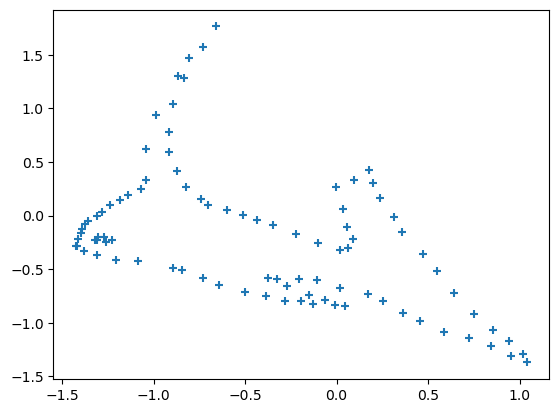

In [5]:
plt.scatter(fish[0, :], fish[1, :], marker='+')

In [ ]:
# Generate a rotated version
theta = -np.pi/6 # you can change this
R = np.eye(2) # replace this with a rotation matrix depending on theta
Y = R@fish  + 0.05*np.random.randn(fish.shape[1]) # transform + add noise

In [ ]:
plt.scatter(fish[0, :], fish[1, :], marker='+')
plt.scatter(Y[0, :], Y[1, :], marker='x')

In [8]:
def compute_R(P, Q):
    """
    Compute the rotation matrix that transforms P into Q

    Parameters
    ----------
    P : input data matrix (2xN)
    Q: transformed data matrix (2xN)
    
    Returns
    -------
    the estimated rotation matrix
    """
    # BEGIN SOLUTION
    S = P@Q.T
    U, Si, Vt = np.linalg.svd(S)
    return Vt.T@U.T
    # END SOLUTION

In [ ]:
R_r = compute_R(fish, Y)
yr = R@fish

In [ ]:
plt.scatter(yr[0, :], yr[1, :], marker='+')
plt.scatter(Y[0, :], Y[1, :], marker='x')

In [ ]:
grader.check("q1p5")

## 2. Finding the translation $\mathbf{t}$


<!-- BEGIN QUESTION -->

2.1 Let us consider the function 
$$
F(\mathbf{t}) = \sum_{k=1}^n \| (R\mathbf{p}_k+\mathbf{t}) - \mathbf{q}_k \|^2,
$$ with $\mathbf{t}\in\mathbb{R}^d$.

Let us also introduce the following quantities $\bar{\mathbf{p}}=\frac{1}{n}\sum_{k=1}^n\mathbf{p}_k$ and $\bar{\mathbf{q}}=\frac{1}{n}\sum_{k=1}^n\mathbf{q}_k$.

Solve
$$
\frac{\partial F(\mathbf{t})}{\partial \mathbf{t}} = 0
$$ 
and find the optimal value of $\mathbf{t}$

Hint: if $x\in\mathbb{R}^d$ is a vector, the following holds:
$$
\frac{\partial x^Tx}{\partial x} = 2x^T
$$

_Type your answer here, replacing this text._

Given the definition of the norm, the derivative of $F(\mathbf{t})$ is 
$$
\frac{\partial F(\mathbf{t})}{\partial \mathbf{t}} = 2\sum_{k=1}^n  (R\mathbf{p}_k+\mathbf{t}) - \mathbf{q}_k \\
= \sum_{k=1}^n  2R\mathbf{p}_k + 2\mathbf{t} - 2\mathbf{q}_k
$$
Therefore we have $\frac{\partial F(\mathbf{t})}{\partial \mathbf{t}}=0$ for $n\mathbf{t} = \sum_{k=1}^n  \mathbf{q}_k -R\mathbf{p}_k $, which leads to $\mathbf{t} = \bar{\mathbf{q}} - R\bar{\mathbf{p}}$.

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

2.2 Let us define $\mathbf{p}^\prime_k = \mathbf{p}_k - \bar{\mathbf{p}}$ and $\mathbf{q}^\prime_k = \mathbf{q}_k - \bar{\mathbf{q}}$. Prove that 
$$
F(\mathbf{t}) = \sum_{k=1}^n \| R\mathbf{p}^\prime_k - \mathbf{q}^\prime_k \|^2,
$$

_Type your answer here, replacing this text._

Introducing the result of the previous question in $F$, this leads to 
$$
R\mathbf{p}_k+\mathbf{t} - \mathbf{q}_k  = R\mathbf{p}_k+\bar{\mathbf{q}}-R\bar{\mathbf{p}}  - \mathbf{q}_k \\
R(\mathbf{p}_k+\bar{\mathbf{p}}) \bar{\mathbf{q}}- \mathbf{q}_k = R\mathbf{p}^\prime_k - \mathbf{q}^\prime_k
$$

<!-- END QUESTION -->

2.3 Now we have found both $R$ and $\mathbf{t}$, we can test on a numerical example

In [ ]:
# Generate a rotated + translated version
t = np.array([-0.5, 1]).reshape(2,1) # change this if you wish
Yt = R@fish  + t + 0.05*np.random.randn(fish.shape[1]) # transform + add noise

In [ ]:
plt.scatter(fish[0, :], fish[1, :], marker='+')
plt.scatter(Yt[0, :], Yt[1, :], marker='x')

In [11]:
def do_registration(P, Q):
    """
    Performs the registration (translation + rotation) that transforms P into Q

    Parameters
    ----------
    P : input data matrix (2xN)
    Q: transformed data matrix (2xN)
    
    Returns
    -------
    the translated/rotated P that fits Q
    """
    # BEGIN SOLUTION
    pmean = np.mean(P, axis=1).reshape(2, 1)
    qmean = np.mean(Q, axis=1).reshape(2, 1)
    pp = P - pmean
    qp = Q - qmean
    
    # compute rotation
    R = compute_R(pp, qp)
    
    # compute translation
    t = qmean - R@pmean
    
    return (R@P + t)  # return the estimated transformed version of P 
    # END SOLUTION

In [ ]:
Yr = do_registration(fish, Yt)

In [ ]:
plt.scatter(Yt[0, :], Yt[1, :], marker='+')
plt.scatter(Yr[0, :], Yr[1, :], marker='x')

In [ ]:
grader.check("q2p3")